# Abstract

Over the past decades significant progress has been made globally on the way to more equitable education. However, these achievements have been at stake since the outbreak of COVID-19 and the associated lockdowns and school closures that had been implemented to limit the spread of the disease. To measure the quality of digital educational experience and to uncover possible root causes for inequitable education, we have developed a metric called the Digital Pedagogical Experience Index based on the provided LearnPlatform dataset. This metric was then analysed for different timeframes in 2020 and explored together with state-level factors such as ethnicity, wealth and technology access. 

The key findings are:
- The quality of digital educational experience was correlated to the state-level income and also its internet access in the academic year 2019/20 after the COVID-19 outbreak
- This correlation was not visible anymore after the 2020 summer break although schools were partially ordered open across the U.S.. We assume that the reason for this is the fact that some school districts provided their children with the neccessary technological equipment to be able to participate in Distance Learning.

*Maslow before Bloom* means that before children are able to learn complex concepts, their firstly must have their most fundamental needs met.
It is often joked about that access to WiFi has become a basic human need in our modern day and age. However, our analysis has shown that access to internet plays a key factor for successful Distance Learning. Providing children with the neccessary technological equipmentnshould be considered as best practice by policy makers in the future to help creating a equitable foundation for modern types of learning.

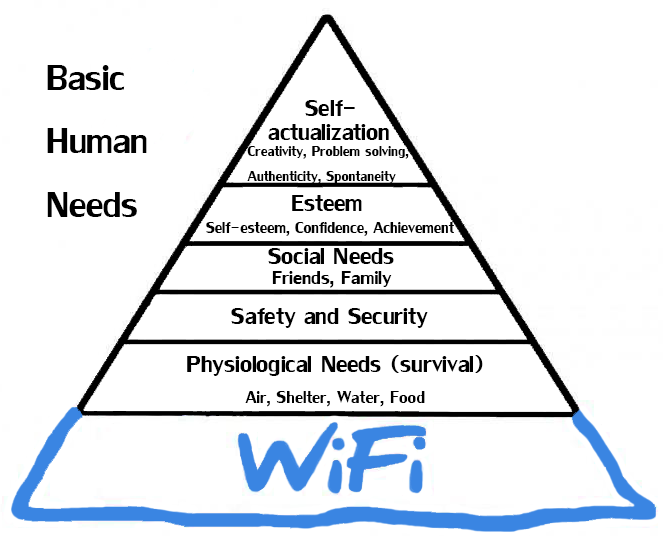

*Image Source: <a href="https://knowyourmeme.com/photos/1296258-hierarchy-of-needs-pyramid-parodies">Know Your Meme</a>*

# Introduction

Besides the covering of basic physical needs, education is the most important factor that decides how children's potential develops for the remainder of their life. Over the past decades significant progress has been made globally on the way to more equitable education, supporting a greater share of children from poorer households to receive a quality education and extend the years spend in school to increase the quality of the formal education per child. These achievements have been at stake since the outbreak of COVID-19 and the associated lockdowns and school closures that had been implemented to limit the spread of the disease.

>„The pandemic is expected to lead to a reversal in recent progress towards equity. With the shift towards remote learning, those from the poorest households and other vulnerable groups are less equipped to participate and more likely to drop out permanently or for extended periods.“ ([Progress and Info SDG No. 4](https://sdgs.un.org/goals/goal4))

Even before the pandemic a strong trend emerged in Online Learning formats, giving people with internet access the possibility to receive different kinds of further education or postgraduate training in a way that was not available before. This kind of Online Learning is commonly referred to as eLearning. eLearning is generally perceived as a positive tool that supports people to increase the quality of their education in different stages of their career [6]. Regularly, eLearning is not the only source of education but is used as a complementary source of education in so called blended learning approaches.

With the COVID-19 pandemic and the resulting lockdowns and school closures which had been implemented in most of the world, the requirement to provide education to students in a remote way on a large scale arose effectively overnight.
In contrast to eLearning, the concept of Distance Learning is focussing more on the distance between the a student and a teacher. In this case technology is needed to create a link between student and teacher.

It is expected that Distance Learning increases the dependency of children’s educational outcomes on their social background or parents’ household income and thus strengthens existing inequities for future generations based on those factors.
According to [1] factors to measure **educational equity/inequality can be broken down into three dimensions, that influence children’s personal and academic development: Opportunities, Experiences and Outcomes.**

For our consideration, we will exclude the dimension Outcomes since relevant data (e.g. PISA test data) is not available yet. This dimension will probably be the most important factor for researchers and policy makers to use as reference to evaluate the effects of distance learning during lockdowns in retrospective.
Based on the available data we will focus on the dimensions Opportunities and Experiences. Therefore, the total usage of distance learning tools during lockdowns and school closures is utilised to measure Opportunities and a metric will be derived by categorising the available tools to measure good Experiences for students using the available tools.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Rectangle
from matplotlib.ticker import MultipleLocator
from matplotlib.lines import Line2D

import re

from math import pi

import warnings
warnings.filterwarnings("ignore")

# Setup color palette
# Color palette is created by using a screenshot from https://learnplatform.com/ and retrieving color codes via https://imagecolorpicker.com/

lp_blue = '#0070c0'
lp_turquoise = '#3c9e78'
lp_green = '#70c738'
lp_grey = '#8e9094'
lp_grey_light = '#f0f0f0'

# Set Color Palettes for the notebook
lp_palette1 = [lp_blue, lp_green, lp_turquoise,  lp_grey, lp_grey_light]
#display(sns.palplot(sns.color_palette(lp_palette1)))

lp_cmap = LinearSegmentedColormap.from_list("", [lp_blue,  '#5cd0da',  lp_turquoise, lp_green])
plt.cm.register_cmap("lp_cmap", lp_cmap)
lp_cmap2 = LinearSegmentedColormap.from_list("", [lp_blue,  '#ffffff', lp_green])
plt.cm.register_cmap("lp_cmap2", lp_cmap2)

def get_lp_palette(n_colors):
    if n_colors == 2:
        lp_cmap = LinearSegmentedColormap.from_list("", [lp_blue, lp_green])
        plt.cm.register_cmap("lp_cmap0", lp_cmap)
        return sns.color_palette("lp_cmap0", n_colors=n_colors)
    elif n_colors == 3:
        lp_cmap = LinearSegmentedColormap.from_list("", [lp_blue, lp_turquoise, lp_green])
        plt.cm.register_cmap("lp_cmap1", lp_cmap)
        return sns.color_palette("lp_cmap1", n_colors=n_colors)
    else:       
        return sns.color_palette("lp_cmap", n_colors=n_colors)

# Methodology

The objective of this section is to find a metric to measure the quality of the pedagogical experience for distance learning. To find such a metric, we will first explore the provided LearnPlatform dataset with regards to learning experiences. Then, we will build a metric based on the findings of the Exploratory Data Analysis (EDA).

## LearnPlatform Dataset and Setup
For this challenge, we were provided a dataset by LearnPlatform. The dataset mainly contains the engagement data with 8417 unique educational tools of 233 school districts in 2020 in the USA.

The following **preprocessing** steps were conducted:
- Remove districts with no state information 
- Remove districts with incomplete 2020 engagement data
- Remove rows in engagement_data that is not in products_info (8417 unique products in engagement data, but only 369 unique products in `products_info`)
- Clean values in ‘Primary Essential Function’ (make 'Sites, Resources & References' and 'Sites, Resources & Reference’ into one )

The following **feature engineering** steps were conducted:
- Split columns ‘Primary Essential Function’ into main and sub functions
- Create new columns ‘weekday’, ‘calendar_week’ for engagement data
- Filter only weekday data
- Resample on weekly basis 
- Create new column “covid phase”
    - 0: school year 2019/2020 before covid
    - 1: school year 2019/2020 under covid
    - 2: school year 2020/2021 under covid

In [ ]:
###### districts_info ######
districts_info = pd.read_csv("../input/learnplatform-covid19-impact-on-digital-learning/districts_info.csv")

# Dropping districts with NaN states
districts_info = districts_info[districts_info.state.notna()].reset_index(drop=True)

# Drop column county_connections_ratio which does not contain any valuable information
districts_info = districts_info.drop('county_connections_ratio', axis=1)

def replace_ranges_pct(range_str):
    if range_str == '[0, 0.2[':
        return 0.1
    elif range_str == '[0.2, 0.4[':
        return 0.3
    elif range_str == '[0.4, 0.6[':
        return 0.5
    elif range_str == '[0.6, 0.8[':
        return 0.7
    elif range_str == '[0.8, 1[':
        return 0.9
    else:
        return np.nan
    
districts_info['pct_black/hispanic'] = districts_info['pct_black/hispanic'].apply(lambda x: replace_ranges_pct(x))

# Replace state strings with abbreviations
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District Of Columbia': 'DC',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

districts_info['state'] = districts_info['state'].replace(us_state_abbrev)

###### products_info ######
products_info = pd.read_csv("../input/learnplatform-covid19-impact-on-digital-learning/products_info.csv")

# Convert column names to lower case and replace spaces with underscores
products_info.columns = [f"{re.sub(' ', '_', col.lower())}" for col in products_info.columns]

# Splitting up the primary essential functions
products_info['primary_function_main'] = products_info['primary_essential_function'].apply(lambda x: x.split(' - ')[0] if x == x else x)
products_info['primary_function_sub'] = products_info['primary_essential_function'].apply(lambda x: x.split(' - ')[1] if x == x else x)

# Synchronize similar values
products_info['primary_function_sub'] = products_info['primary_function_sub'].replace({'Sites, Resources & References' : 'Sites, Resources & Reference'})
products_info.drop("primary_essential_function", axis=1, inplace=True)

###### engagement_data ######
temp = []

for district in (districts_info.district_id.unique()):
    df = pd.read_csv(f'../input/learnplatform-covid19-impact-on-digital-learning/engagement_data/{district}.csv', index_col=None, header=0)
    df["district_id"] = district
    if df.time.nunique() == 366:
        temp.append(df)

engagement = pd.concat(temp)
engagement = engagement.reset_index(drop=True)
del temp

# Only consider districts with full 2020 engagement data
districts_info = districts_info[districts_info.district_id.isin(engagement.district_id.unique())].reset_index(drop=True)
products_info = products_info[products_info.lp_id.isin(engagement.lp_id.unique())].reset_index(drop=True)

# Only consider engagement data with lp_id in products_info
engagement = engagement[engagement.lp_id.isin(products_info.lp_id.unique())].reset_index(drop=True)

# Convert time
engagement.time = engagement.time.astype('datetime64[ns]')

# Create new features
engagement['cw'] = pd.DatetimeIndex(engagement['time']).week
engagement['weekday'] = pd.DatetimeIndex(engagement['time']).weekday

# Fill NaN in column engagement_index with 0
engagement['engagement_index'] = engagement['engagement_index'].fillna(0)

# Only look at engagement on weekdays
engagement = engagement[engagement.weekday < 5].reset_index(drop=True)

# Resample average data on weekly basis
engagement_cw = engagement.groupby(['cw', 'lp_id', 'district_id'])['pct_access', 'engagement_index'].mean().reset_index(drop=False)

# Covid phase:
# -1 : Summer break
# 0 : Academic year 2019/20 before COVID-19
# 1 : Academic year 2019/20 during COVID-19
# 2 : Academic year 2020/21 during COVID-19
engagement_cw['covid_phase'] = engagement_cw.cw.apply(lambda x: 0 if x < 10 else (2 if x > 35 else (1 if ((x>=10) & (x <=25)) else -1)))


###### Merge all dataframes to one big dataframe ######
all_data = engagement_cw.merge(products_info[['lp_id', 'product_name', 'primary_function_main', 'primary_function_sub']], on='lp_id')
all_data = all_data.merge(districts_info, on='district_id')

## Exploratory Data Analysis
In this EDA, we will try to answer the following analysis questions with respect to educational experience:
- What does distance learning look like?
- Are there different types of distance learning?
- Can we find indicators to evaluate the quality of the different types of distance learning?

According to [1], the “Educational experiences are the processes and interactions that occur in schools, such as classroom disciplinary climate, student-teacher relations, teacher expectations, pedagogical practices, and relations with peers.” Therefore, we will explore the data from two different points of views: The relations with teachers and peers and the applied pedagogical practices.

### Relations with Peers and Teachers

In 2020, COVID-19 forced us to practice social distancing, which led to the rise of video conferencing products. Many facets of our lives from business meetings, yoga practice, hanging out with friends suddenly were happening in some sort of video conference. In below figure, we can see that the same applies to education. With the rise of average daily new COVID-19 cases, the percentage of U.S. students with at least one page-load event of a virtual classroom product rises around calendar week 12 in 2020. 

In [ ]:
###### us_covid19_daily ######

us_covid = pd.read_csv("../input/covid19-in-usa/us_covid19_daily.csv")
us_covid['date'] = pd.to_datetime(us_covid.date, format = '%Y%m%d')
us_covid['cw'] = pd.DatetimeIndex(us_covid['date']).week

us_covid = us_covid.sort_values(by='date')
us_covid['new_cases'] = us_covid['positive'].diff()

us_covid = us_covid.groupby('cw')[['new_cases']].mean().reset_index(drop=False)

# Visualize
virtual_classroom_lp_id = products_info[products_info.primary_function_sub == 'Virtual Classroom'].lp_id.unique()

engagement_sum = engagement_cw[engagement_cw.lp_id.isin(virtual_classroom_lp_id)].groupby(['cw', 'district_id']).pct_access.sum().to_frame().reset_index()

# visualize 
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 6))
temp = engagement_sum.groupby('cw').pct_access.mean().to_frame().reset_index(drop=False)
sns.lineplot(x=temp.cw, y=temp.pct_access, label=f'Virtual Classroom pct_access', color= lp_palette1[0], legend=False)
ax.set_ylim([0, 100])  
ax.set_xlim([1, 53])  

ax2 = ax.twinx()
sns.lineplot(x=us_covid.cw, y=us_covid.new_cases, ax=ax2, color= lp_palette1[1], label = 'Avg. Weekly New Covid Cases', legend=False)
ax2.set_ylim([0, 200000])  

# https://www.mykidstime.com/school/here-are-the-school-holidays-2019/
# https://www.edarabia.com/school-holidays-united-states/
# Mid Winter Break
ax.add_patch(Rectangle((7.5, 0), 1, 100, fill=True, alpha=0.2, color='Grey', lw=0))
ax.annotate('Mid Winter Break', xy=(8, 60), fontsize=14, color='black', rotation=90, va='center', ha='center')

# Spring Break
ax.add_patch(Rectangle((16.5, 0), 1, 100, fill=True, alpha=0.2, color='Grey', lw=0))
ax.annotate('Spring Break', xy=(17, 60), fontsize=14, color='black', rotation=90, va='center', ha='center')

# Summer Break
ax.add_patch(Rectangle((25.5, 0), 7, 100, fill=True, alpha=0.2, color='Grey', lw=0))
ax.annotate('Summer Break', xy=(29, 60), fontsize=14, color='black', rotation=90, va='center', ha='center')

# Thanksgiving
ax.add_patch(Rectangle((47.5, 0), 1, 100, fill=True, alpha=0.2, color='Grey', lw=0))
ax.annotate('Thanksgiving', xy=(48, 60), fontsize=14, color='black', rotation=90, va='center', ha='center')

# Christmas
ax.add_patch(Rectangle((51.5, 0), 3, 100, fill=True, alpha=0.2, color='Grey', lw=0))
ax.annotate('Christmas', xy=(52.5, 60), fontsize=14, color='black', rotation=90, va='center', ha='center')

ax.set_xlabel('Calendar Week 2020')
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.set_ylabel('Percentage of U.S. Students \nwith At Least One Page-Load Event \nof a Virtual Classroom Product [%]', color=lp_palette1[0])
ax.tick_params(axis='y', colors = lp_palette1[0])

ax2.set_ylabel('Average Daily New Covid-19 Cases', color=lp_palette1[1])
ax2.tick_params(axis='y', colors = lp_palette1[1])

plt.show()

Although, a lot of human interaction gets lost in video conferences, we could argue that providing  students the opportunity to participate in virtual classrooms enabled them to interact with their teachers and peers. **Therefore, the usage of a virtual classroom product could be an indicator for a good educational experience.**

However, we can also see that only about 20% of U.S. students used a virtual classroom product  daily in the academic year 2019/20 after the outbreak of COVID-19 and it only slightly increased to about 30% in the academic year 2020/21. That would indicate that the majority of U.S. students did not have the opportunity to participate in virtual classrooms.

If we have a look at the top 5 most popular products in the academic year 2020/21 by engagement, we can see that YouTube, an online video sharing platform, ranks third in both `pct_access` and `engagement_index`. 


In [ ]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

palette ={"Content Creation & Curation": get_lp_palette(8)[0], 
          "Learning Management Systems (LMS)": get_lp_palette(8)[1], 
          "Sites, Resources & Reference": lp_green,  
          "Virtual Classroom": get_lp_palette(8)[2], 
         "Online Course Providers & Technical Skills Development": get_lp_palette(8)[3], 
         "Other" : lp_grey, 
         }

temp = all_data.groupby(['lp_id','covid_phase', ])[['pct_access']].mean().reset_index(drop=False)
temp = temp.pivot(index='lp_id', columns='covid_phase').pct_access.fillna(0)
temp = temp.merge(products_info[['lp_id', 'product_name', 'primary_function_sub']], on='lp_id')
temp = temp.sort_values(by=2, ascending=False).head(5)

sns.barplot(x="product_name", y=2, hue="primary_function_sub",data=temp, palette=palette, ax=ax[0])
ax[0].get_legend().remove()
ax[0].set_xlabel('Product Name')
ax[0].set_ylabel('Average Weekly Percentage of Students \nthat Have At Least 1 Page-Load Event \nof the Product [%]')
for tick in ax[0].get_xticklabels():
    tick.set_rotation(45)
    
    
temp = all_data.groupby(['lp_id','covid_phase', ])[['engagement_index']].mean().reset_index(drop=False)
temp = temp.pivot(index='lp_id', columns='covid_phase').engagement_index.fillna(0)
temp = temp.merge(products_info[['lp_id', 'product_name', 'primary_function_sub']], on='lp_id')
temp = temp.sort_values(by=2, ascending=False).head(5)
sns.barplot(x="product_name", y=2, hue="primary_function_sub",data=temp, palette=palette, ax=ax[1])
ax[1].get_legend().remove()
ax[1].set_xlabel('Product Name')
ax[1].set_ylabel('Average Weekly Total Page-Load Events \nper 1000 Students of the Product')
for tick in ax[1].get_xticklabels():
    tick.set_rotation(45)
    
custom_lines = [Line2D([0], [0], color=lp_green, lw=4),
                Line2D([0], [0], color=get_lp_palette(8)[0], lw=4),
                Line2D([0], [0], color=get_lp_palette(8)[1], lw=4),
                Line2D([0], [0], color=get_lp_palette(8)[2], lw=4),
                Line2D([0], [0], color=get_lp_palette(8)[3], lw=4),
                Line2D([0], [0], color=lp_grey, lw=4),
               ]

f.legend(custom_lines, 
         ["Sites, Resources & Reference", "Content Creation & Curation", "Learning Management Systems (LMS)",  "Virtual Classroom", "Online Course Providers & Technical Skills Development", "Other"],
        bbox_to_anchor=(0.5, 0))


plt.suptitle('Top 5 Most Popular Products in Academic Year 2020/21')
plt.tight_layout()
plt.show()

YouTube provides students the possibility to view prerecorded lessons. Although, teachers can present their lessons in a similar manner as in a video conference, the educational experience is different: By only providing prerecorded video lessons, students are only receiving unidirectional interactions instead of bi-directional interactions with their teachers and peers. However, the usage of YouTube can also be beneficial if virtual classroom lessons are recorded and then later provided for students to review. **Therefore, the usage of YouTube alone would be an indicator for a medium educational experience and the usage of YouTube in addition to the usage of virtual classroom products would be an indicator for good educational experience.**

### Pedagogical Practices

By Taking a look at the primary sub-functions’ products with the strongest change in engagement from before the pandemic compared to the academic year 2020/21, we notice that the top 3 sub-functions are the same in both cases: Virtual Classroom, Learning Management Systems (LMS) and Online Course Providers & Technical Skills Development.

In [ ]:
temp = all_data.groupby(['covid_phase', 'primary_function_sub'])['pct_access', 'engagement_index'].mean().reset_index(drop=False)

temp.covid_phase = temp.covid_phase.astype(str)
temp = temp.pivot(index='primary_function_sub', columns='covid_phase')[['pct_access', 'engagement_index']].fillna(0)

temp.columns = ["_".join(a) for a in temp.columns.to_flat_index()]

temp['pct_access_delta'] = temp['pct_access_2'] - temp['pct_access_0']
temp['engagement_index_delta'] = temp['engagement_index_2'] - temp['engagement_index_0']
temp=temp.reset_index(drop=False)

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

df = temp.sort_values(by='pct_access_delta', ascending=False)
sns.barplot(data=df, x='pct_access_delta', y='primary_function_sub', palette=get_lp_palette(len(df)), ax=ax[0])
ax[0].set_xlabel('Change in Average Weekly Percentage of Students \nthat Have At Least 1 Page-Load Event \nof the Primary Sub-Function [%]')
ax[0].set_ylabel('')

df = temp.sort_values(by='engagement_index_delta', ascending=False)
sns.barplot(data=df, x='engagement_index_delta', y='primary_function_sub', palette=get_lp_palette(len(df)), ax=ax[1])
ax[1].set_xlabel('Change in Average Weekly Total Page-Load Events \nper 1000 Students of the Primary Sub-Function')
ax[1].set_ylabel('')

plt.suptitle('Change in Engagement of Primary Sub-Functions between Q1 2020 and Academic Year 2020/21')
plt.tight_layout()
plt.show()

Since we have already looked at products from the primary sub-function “Virtual Classroom” in the previous section, we will now focus on the latter two sub-functions. 
Looking at the products in both sub-functions the following findings emerge: Firstly, the LMS products Schoology and Google Classroom gained the most engagement. Also, the product Canvas is mainly responsible for the engagement gain in the sub-function “Online Course Providers & Technical Skills Development”.

In [ ]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

for i, function in enumerate(['Learning Management Systems (LMS)', 'Online Course Providers & Technical Skills Development']):
    temp = all_data[all_data.primary_function_sub == function].groupby(['covid_phase', 'product_name'])['pct_access', 'engagement_index'].mean().reset_index(drop=False)

    temp.covid_phase = temp.covid_phase.astype(str)
    temp = temp.pivot(index='product_name', columns='covid_phase')[['pct_access', 'engagement_index']].fillna(0)

    temp.columns = ["_".join(a) for a in temp.columns.to_flat_index()]

    temp['pct_access_delta'] = temp['pct_access_2'] - temp['pct_access_0']
    temp['engagement_index_delta'] = temp['engagement_index_2'] - temp['engagement_index_0']
    temp=temp.reset_index(drop=False)
    df = temp.sort_values(by='pct_access_delta', ascending=False)

    sns.barplot(data=df, x='pct_access_delta', y='product_name', palette=get_lp_palette(len(df)), ax=ax[i])
    ax[i].set_title(function)
    ax[i].set_xlabel('Change in Average Weekly Percentage of Students \nthat Have At Least 1 Page-Load Event \nof the Product [%]')
    ax[i].set_ylabel('')


plt.suptitle('Change in Engagement by Primary Sub-Function between Q1 2020 and Academic Year 2020/21')

plt.tight_layout()
plt.show()

However, Canvas is in fact also an LMS product by the company Instructure. The LMS product was originally also named Instructure as it can be seen as a product in the LMS sub-function. Therefore, it can be assumed that Canvas should be assigned the sub-function LMS as well. Under this assumption, the primary sub-function “Online Course Providers & Technical Skills Development” did not have a large engagement gain. Instead, we can see the importance of LMS products.

An LMS is a software product that helps teachers structure and organise their teaching materials. **Therefore, the usage of LMS products such as Schoology, Google Classroom or Canvas could be an indicator for a good educational experience.**

## Digital Pedagogical Experience Index

During the previous EDA, we mainly found three indicators for the quality of digital educational experiences. The first indicator is whether products from the primary sub-function “Virtual Classroom” was used. The second indicator is closely related to the first, as the usage of YouTube could be used alternatively or additionally to products from the primary sub-function “Virtual Classroom”. Lastly, we found that the usage of LMS products such as Schoology, Google Classroom or Canvas can be another indicator for a good educational experience.

Below an example is shown how districts can be compared using these three indicators. While  in district 1904 more than 60% of students were participating in virtual classrooms on a daily basis, in district 7457 less than 10% of students were participating in virtual classrooms. Additionally, the usage of supplementary video lessons were quite low in both districts. That means, that the lack of attendance in virtual classrooms in district 7457 was not compensated by alternative usage of YouTube but instead is seems like students had to take care of their own studies with little interactions with their teachers and peers. Also, we can see that the percentage of students using an LMS product on a daily basis was half of the percentage of district 1904 in district 7457. 
Therefore, we can assume that the quality of the educational experience was much better in district 1904 than in district 7457.

In [ ]:
def calculate_pedagogical_experience_index(covid_phase, all_data, districts_info):
    """
    Description:
        Calculates the Digital Pedagogical Experience Index for a given timeframe (covid_phase) in 2020.
        
    Params:
        covid_phase: Integer between 0 and 2 describing pandemic phase in 2020
            0 : Academic year 2019/20 before COVID-19
            1 : Academic year 2019/20 during COVID-19
            2 : Academic year 2020/21 during COVID-19

    Returns:
        districts_info
    """
    
    df = all_data[all_data.covid_phase == covid_phase].drop('covid_phase', axis=1).reset_index(drop=True)

    temp = df[df.primary_function_sub == 'Virtual Classroom'].groupby(['district_id', 'product_name']).pct_access.mean().to_frame().reset_index(drop=False)
    temp = temp.groupby('district_id').pct_access.sum().sort_values(ascending=False).to_frame().reset_index(drop=False)
    temp.columns = ['district_id', f'pct_access_vc_{covid_phase}']
    districts_info = districts_info.merge(temp, on='district_id')

    temp = df[(df.product_name == 'Canvas') | (df.primary_function_sub == 'Learning Management Systems (LMS)')].groupby(['district_id', 'product_name']).pct_access.mean().to_frame().reset_index(drop=False)
    temp = temp.groupby('district_id').pct_access.sum().sort_values(ascending=False).to_frame().reset_index(drop=False)
    temp.columns = ['district_id', f'pct_access_lms_{covid_phase}']
    districts_info = districts_info.merge(temp, on='district_id')

    temp = df[df.product_name == 'YouTube'].groupby(['district_id']).pct_access.mean().to_frame().reset_index(drop=False)
    temp.columns = ['district_id', f'pct_access_youtube_{covid_phase}']
    districts_info = districts_info.merge(temp, on='district_id')

    districts_info[f'digital_pedagogical_experience_index_{covid_phase}'] = districts_info[f'pct_access_vc_{covid_phase}'] + districts_info[f'pct_access_lms_{covid_phase}'] + districts_info[f'pct_access_youtube_{covid_phase}'] 

    return districts_info

districts_info = calculate_pedagogical_experience_index(1, all_data, districts_info)
districts_info = calculate_pedagogical_experience_index(2, all_data, districts_info)



### Visualize ###

# Initialise the spider plot
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, polar=True)

# Set data
df = districts_info[['district_id', 'pct_access_vc_1', 'pct_access_lms_1',  'pct_access_youtube_1',]]
df.columns = ['district_id', 'Virtual\nClassroom', 'LMS', 'Supplementary\nVideo Materials',] 

# number of variable
categories=list(df)[1:]
N = len(categories)
#################################################################### 
values=df[df.district_id == 1904].reset_index(drop=True).loc[0].drop('district_id').values.flatten().tolist()
values += values[:1]
 
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
ax.plot(angles, values, lp_green, linewidth=1, linestyle='solid', label='District 1904')
ax.fill(angles, values, lp_green, alpha=0.1)

#################################################################### 
values=df[df.district_id == 7457].reset_index(drop=True).loc[0].drop('district_id').values.flatten().tolist()
values += values[:1]
 
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
ax.plot(angles, values, lp_blue, linewidth=1, linestyle='solid', label='District 7457')
ax.fill(angles, values, lp_blue, alpha=0.1)

#################################################################### 

# Show the graph
plt.xticks(angles[:-1], categories)#, color='grey')#, size=8)
ax.set_rlabel_position(180)

plt.suptitle('Example Comparison of Digital Pedagogical Experiences between Two Districts')
plt.ylim(0,70)
plt.legend()
plt.show()

Based on the above findings, we will create a metric to measure the quality of the pedagogical experience for distance learning as the sum of the above three indicators. We will call this new metric the **Digital Pedagogical Experience Index (DPEI):** 

$\text{DPEI} = \sum \text{% Virtual Classroom Products Usage} + \text{% Supplementary Video Material Usage} + \sum \text{% LMS Products Usage}$

# Experiments

In this section, we will evaluate how the newly defined metric to measure the quality of the pedagogical experience for distance learning relates to different demographic, socioeconomic, and geographic factors and how these change over the course of the pandemic.

## Supplementary Datasets

For the following experiments the following supplementary datasets were used:
* [US Census Demographic Data](https://www.kaggle.com/muonneutrino/us-census-demographic-data): Used for state-level ethnicity data (Hispanic and Black)
* [US Broadband Availability](https://www.kaggle.com/mmattson/us-broadband-availability): Used for state-level connectivity data (Access to Computer, Access to Internet)
* [COVID-19 State Data](https://www.kaggle.com/nightranger77/covid19-state-data): Used for state-level wealth data (Gini Coefficient, Income, GDP)
* Created dataframe manually with information about state-level COVID-19 related school closure/opening policies based on:
    * https://www.edweek.org/leadership/map-coronavirus-and-school-closures-in-2019-2020/2020/03
    * https://www.edweek.org/leadership/map-where-are-schools-closed/2020/07

In [ ]:
###### Statewise demographic data ######

# Wealth
us_states = pd.read_csv("../input/covid19-state-data/COVID19_state.csv")
us_states['State'] = us_states['State'].replace(us_state_abbrev)
us_states = us_states[['State', 'Gini', 'Income', 'GDP']]
us_states.columns = ['state', 'gini', 'income', 'gdp']

# Broadband access
broadband_access = pd.read_csv("../input/us-broadband-availability/broadband_access.csv")
broadband_access = broadband_access[['state_abr', 'no_comp', 'no_internet']]
broadband_access = broadband_access.groupby('state_abr').mean().reset_index(drop=False)
broadband_access.columns = ['state', 'no_comp', 'no_internet']

# Ethnicity
demographic_data = pd.read_csv("../input/us-census-demographic-data/acs2017_county_data.csv")
demographic_data = demographic_data[['State', 'Hispanic', 'Black']]
demographic_data['State'] = demographic_data['State'].replace(us_state_abbrev)
demographic_data = demographic_data.groupby('State').mean().reset_index(drop=False)
demographic_data.columns = ['state', 'Hispanic', 'Black']
demographic_data['pct_black/hispanic_state'] = demographic_data['Hispanic'] + demographic_data['Black']


# https://www.edweek.org/leadership/map-coronavirus-and-school-closures-in-2019-2020/2020/03
# https://www.edweek.org/leadership/map-where-are-schools-closed/2020/07

us_state_policy_array = [
    ['AL', 'ordered closed', 'no order in effect'],
    ['AK', 'ordered closed', 'no order in effect'],
    ['AS', 'ordered closed', 'no order in effect'],
    ['AZ', 'ordered closed', 'some grades ordered open'],
    ['AR', 'ordered closed', 'ordered open (full-time)'],
    ['CA', 'recommended closed', 'no order in effect'],
    ['CO', 'ordered closed', 'no order in effect'],
    ['CT', 'ordered closed', 'no order in effect'],
    ['DE', 'ordered closed', 'partial closure in effect'],
    ['DC', 'ordered closed', 'partial closure in effect'],
    ['FL', 'recommended closed', 'ordered open (full-time)'],
    ['GA', 'ordered closed', 'no order in effect'],
    ['GU', 'ordered closed', 'no order in effect'],
    ['HI', 'ordered closed', 'partial closure in effect'],
    ['ID', 'recommended closed', 'no order in effect'],
    ['IL', 'ordered closed', 'no order in effect'],
    ['IN', 'ordered closed', 'no order in effect'],
    ['IA', 'ordered closed', 'ordered open (full-time)'],
    ['KS', 'ordered closed', 'ordered open (full-time)'],
    ['KY', 'recommended closed', 'no order in effect'],
    ['LA', 'ordered closed', 'no order in effect'],
    ['ME', 'recommended closed', 'no order in effect'],
    ['MD', 'ordered closed', 'no order in effect'],
    ['MA', 'ordered closed', 'ordered open (full-time)'],
    ['MI', 'ordered closed', 'no order in effect'],
    ['MN', 'ordered closed', 'no order in effect'],
    ['MS', 'ordered closed', 'no order in effect'],
    ['MO', 'ordered closed', 'no order in effect'],
    ['MT', 'n/a', 'no order in effect'],
    ['NE', 'ordered closed', 'no order in effect'],
    ['NV', 'ordered closed', 'no order in effect'],
    ['NH', 'ordered closed', 'ordered open (part-time)'],
    ['NJ', 'ordered closed', 'no order in effect'],
    ['NM', 'ordered closed', 'ordered open (part-time)'],
    ['NY', 'ordered closed', 'no order in effect'],
    ['NC', 'ordered closed', 'ordered open (part-time)'],
    ['ND', 'ordered closed', 'no order in effect'],
    ['MP', 'ordered closed', 'no order in effect'],
    ['OH', 'ordered closed', 'no order in effect'],
    ['OK', 'ordered closed', 'no order in effect'],
    ['OR', 'ordered closed', 'ordered open (part-time)'],
    ['PA', 'ordered closed', 'no order in effect'],
    ['PR', 'ordered closed', 'partial closure in effect'],
    ['RI', 'ordered closed', 'no order in effect'],
    ['SC', 'ordered closed', 'ordered open (full-time)'],
    ['SD', 'recommended closed', 'no order in effect'],
    ['TN', 'recommended closed', 'no order in effect'],
    ['TX', 'ordered closed', 'ordered open (full-time)'],
    ['UT', 'ordered closed', 'no order in effect'],
    ['VT', 'ordered closed', 'no order in effect'],
    ['VI', 'ordered closed', 'no order in effect'],
    ['VA', 'ordered closed', 'no order in effect'],
    ['WA', 'ordered closed', 'ordered open (part-time)'],
    ['WV', 'ordered closed', 'ordered open (full-time)'],
    ['WI', 'ordered closed', 'no order in effect'],
    ['WY', 'n/a', 'no order in effect'],
]

# Create the pandas DataFrame
us_state_policy = pd.DataFrame(us_state_policy_array, columns = ['state', 'policy_AY1920', 'policy_AY2021'])


# Merge districts_info
districts_info = districts_info.merge(us_state_policy, on='state')
districts_info = districts_info.merge(us_states, on='state')
districts_info = districts_info.merge(broadband_access, on='state')
districts_info = districts_info.merge(demographic_data, on='state')

districts_info = districts_info[['district_id', 'state', 'policy_AY1920', 'policy_AY2021',
                   'pct_black/hispanic', 'pct_black/hispanic_state', 
                   'gini', 'income', 'gdp', 
                   'no_comp', 'no_internet', 
                                'digital_pedagogical_experience_index_1', 'digital_pedagogical_experience_index_2']]

## Experiment 1: Quality of Pedagogical Experience during Academic Year 2019/20 after COVID-19 Outbreak

From March 2020, most states ordered and a few states recommended schools to be closed for rest of the academic year 2019/20 [2]. That means that for the timeframe between CW 10 and 25 we can assume that most students had to participate in distance learning. Below, the correlation matrix between various state-wise factors, such as ethnicity, wealth (Gini Coefficient,  Income, GDP), and technology access (No Computer Access, No Internet Access) is shown for this timeframe.

Firstly, we can see that the DPEI does not correlate to the district level or state level ethnicity distribution. **However, we can see that the DPEI is correlated to the state-level wealth (mainly income) and the state-level technology access (mainly No Access to Internet).**

In [ ]:
cols = [c for c in districts_info.columns if c not in ['district_id', 'state', 'policy_AY1920', 'policy_AY2021','digital_pedagogical_experience_index_2']]
corrmat = districts_info[cols].corr()
# Visualize
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

sns.heatmap(corrmat, annot=True, mask=np.triu(corrmat), vmin=-1, vmax=1, linewidths=1, cmap=lp_cmap2,  fmt='.1f')
labels = ['Ethnicity: % Black/Hispanic (District)', 'Ethnicity: % Black/Hispanic (State)', 'Wealth: Gini Coef. (State)',
       'Wealth: Income (State)', 'Wealth: GDP (State)', 'Tech: No Computer Access (State)', 'Tech: No Internet Access (State)',
       'Digital Pedagogical Experience Index']
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.add_patch(Rectangle((0, 7), 7, 1, fill=False, alpha=1, color=lp_grey, lw=5))

ax.set_title('Correlation of Demographic Factors with Digital Pedagogical Experience Index \nfor Academic Year 2019/20 After COVID-19 Outbreak')
plt.show()

Although the correlation between No Access to Computer and No Access to Internet is high, the higher correlation with No Access to Internet for the DPEI could be explained by the fact that internet resources can also be accessed via smartphones. Moreover, we can see that the state-level income is correlated to the state-level internet access. The detailed plots are shown below.

In [ ]:
x_list = ['pct_black/hispanic', 'no_internet', 'income']
x_label = ['Perc Black/Hispanic', 'No Internet Access', 'Income',]
var_y = 'digital_pedagogical_experience_index_1'

f, ax = plt.subplots(nrows=1, ncols=len(x_list), figsize=(15, 5))

for i, var_x in enumerate(x_list):

    sns.scatterplot(data=districts_info, y=var_y, x=var_x, palette=get_lp_palette(2), ax=ax[i], marker='.', color=lp_blue)

    x=districts_info[var_x]
    y=districts_info[var_y]

    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    ax[i].plot(x,p(x),":", color=lp_green, linewidth=1)
    ax[i].set_ylabel('Digital Pedagogical Experience Index')
    ax[i].set_xlabel(x_label[i])
plt.suptitle('Correlation Details for Digital Pedagogical Experience Index in Academic Year 2019/20 After COVID-19 Outbreak')
plt.tight_layout()
plt.show()

## Experiment 2: Change in Quality of Pedagogical Experience after 2020 Summer Break

For the academic year 2020/21 some states ordered schools to be opened for in-person education again [3]. However, the reality was that most schools opted for a hybrid learning model. That is why we analyze how the DPEI changed between the academic year 2019/20 and the academic year 2020/21.

In below figure, the DPEI in the academic year 2019/20 after March 2020 and the DPEI for the academic year 2020/21 is shown for each district and it is marked whether there was a state-level order. For some districts the DPEI decreased, which can be related to the fact that schools were offering in person education again. **However, for the majority of districts the DPEI increased for the academic year 2020/21 although schools were opened again.**

In [ ]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

sns.scatterplot(data=districts_info, x='digital_pedagogical_experience_index_1', y='digital_pedagogical_experience_index_2', hue='policy_AY2021',                 
                palette= [lp_grey,  lp_green, lp_turquoise, lp_blue, 'olivedrab'],
                linewidth=0.5, s=50)

ax.plot([0, 150], [0, 150], 'k--')
ax.annotate('Improvement', (10, 130), fontsize=16)
ax.annotate('Decline', (120, 10), fontsize=16)

ax.set_ylim([0, 150])
ax.set_xlim([0, 150])
ax.legend(loc='upper right' )
ax.set_xlabel('Digital Pedagogical Experience Index \nin Academic Year 2019/20 After COVID-19 Outbreak')
ax.set_ylabel('Digital Pedagogical Experience Index \nin Academic Year 2020/21')
ax.set_title('Change in Digital Pedagogical Experience Index After Summer Break')
plt.tight_layout()
plt.show()

Another interesting find is that the DPEI for the academic school year 2020/21 has a positive correlation to the state-level No Internet Access which is unexpected and counter-intuitive at first. However, we found, we found that **in some states schools provided their students with Hotspots so they could participate in digital education [4] which could explain the improvement in engagement despite the quote of missing internet access.**

In [ ]:
# Visualize
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 10))

cols = [c for c in districts_info.columns if c not in ['district_id', 'state', 'policy_AY1920', 'policy_AY2021',
                                                       #'pct_black/hispanic', 
                                                       'pct_black/hispanic_state', 
                                                       'gini',  'gdp', 
                                                       #'income','no_comp', 'no_internet',
                                                        #'digital_pedagogical_experience_index_1',
                                                       'digital_pedagogical_experience_index_2']]
corrmat = districts_info[cols].corr()
sns.heatmap(corrmat, annot=True, mask=np.triu(corrmat), vmin=-1, vmax=1, linewidths=1, cmap=lp_cmap2,  fmt='.1f', ax=ax[0])

cols = [c for c in districts_info.columns if c not in ['district_id', 'state', 'policy_AY1920', 'policy_AY2021',
                                                       #'pct_black/hispanic', 
                                                       'pct_black/hispanic_state',
                                                       'gini',  'gdp', 
                                                       #'income','no_comp', 'no_internet',
                                                        'digital_pedagogical_experience_index_1', 
                                                       #'digital_pedagogical_experience_index_2'
                                                      ]]
corrmat = districts_info[cols].corr()
sns.heatmap(corrmat, annot=True, mask=np.triu(corrmat), vmin=-1, vmax=1, linewidths=1, cmap=lp_cmap2,  fmt='.1f', ax=ax[1])

labels = ['Ethnicity: % Black/Hispanic (District)', 
       'Wealth: Income (State)', 'Tech: No Computer Access (State)', 'Tech: No Internet Access (State)',
       'Digital Pedagogical Experience Index']


ax[1].add_patch(Rectangle((2, 4), 2, 1, fill=False, alpha=1, color=lp_grey, lw=5))

for i in range(2):
    ax[i].set_xticklabels(labels)
    ax[i].set_yticklabels(labels)
    
ax[0].set_title('For Academic Year 2019/20 After COVID-19 Outbreak')
ax[1].set_title('For Academic Year 2020/21')
plt.suptitle('Correlation of Demographic Factors with Digital Pedagogical Experience Index')


plt.tight_layout()
plt.show()

# Discussion

The effects of the COVID-19 pandemic and its associated restrictions on movement and closing of educational institutions and workplaces have shown that
without internet access it is impossible to participate in a big part of social and economic life. During our experiments we found that the quality of digital educational experience was correlated to the state-level income and also its internet access in the academic year 2019/20 after the COVID-19 outbreak. However, we also found that this correlation was not visible anymore after the 2020 summer break although schools were partially ordered open across the U.S.. We found that this might be related to the fact that some school districts provided their children with the neccessary technological equipment to be able to participate in Distance Learning.

Teachers have an expression: *Maslow before Bloom* [7]. While Bloom, a psychologist, developed "Bloom's Taxonomy" which orders the complexity of learning outcomes, Maslow's "Hierarchy of Needs" theorizes that humans have a prioritized set of needs that must be fulfilled in order to achieve their full potential. It means that **before children are able to learn complex concepts, their firstly must have their most fundamental needs met.** Therefore, children are unlikely to be able to engage in learning without proper nourishment and shelter.[7]

The joke that is depicted in the introductory meme which gained popularity with the rise of the pandemic but has been relevant long before contains a lot of truth: Besides the other basic human needs such as Physiological Needs or Safety and Security, Internet Access plays an important role. Treating Internet Access as the basis for everything else is of course exaggerated. 
However, in the context of education and the explored data it can be argued that the supply of internet access and hardware devices to students that otherwise would have no possibility to join distance learning programs is a basic requirement.
Securing the supply of internet access and related hardware to all students is of course not the solution to all educational problems. But, conversely it should be very clear, that not doing so excludes an already vulnerable group of students from learning opportunities altogether.

In times of pandemic and physical contact restrictions, the thesis that internet access is a basic need that needs to be satisfied proves true and should urgently be considered before sending children into distance learning. As the data from the school year 2020/21 has shown, this recommendation has been followed by several school districts, which could be detected by the change of correlation between DPEI and No internet access variable. This should be considered as best practice by policy makers in the future to help creating a equitable foundation for distance learning.


# References
[1] Perry, L. B. (2018). Educational inequality in Australia. Committee for economic development of Australia.

[2] Education Week (2020). [Map: Coronavirus and School Closures in 2019-2020](https://www.edweek.org/leadership/map-coronavirus-and-school-closures-in-2019-2020/2020/03)

[3] Education Week (2020). [Map: Where Were Schools Required to Be Open for the 2020-21 School Year?](https://www.edweek.org/leadership/map-where-are-schools-closed/2020/07)

[4] Lieberman, M. in Education Week (2020). [Why Students Still Can’t Access Remote Learning: How Schools Can Help](https://www.edweek.org/technology/why-students-still-cant-access-remote-learning-how-schools-can-help/2020/09)

[5] United Nations (2021). [Progress and Info SDG No. 4](https://sdgs.un.org/goals/goal4)

[6] Li C. and Lalani F. in World Economic Forum (2020). [The COVID-19 pandemic has changed education forever. This is how ](https://www.weforum.org/agenda/2020/04/coronavirus-education-global-covid19-online-digital-learning/)

[7] Siddiqi J. and Wuori D. in EdNC (2020). [Perspective | Learning in the time of COVID: Maslow before Bloom](https://www.ednc.org/perspective-learning-in-the-time-of-covid-maslow-before-bloom/)

In [ ]:

#all_data = all_data.merge(us_state_policy, on='state')

# Visualize
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

sns.countplot(data=us_state_policy, y='policy_AY1920', palette=get_lp_palette(3), ax=ax[0])
ax[0].set_title('Number of States Where Schools Were \nRequired to Be Closed for the Spring 2020')

sns.countplot(data=us_state_policy, y='policy_AY2021', palette=get_lp_palette(5), ax=ax[1])
ax[1].set_title('Number of States Where Schools Were \nRequired to Be Open for the 2020-21 School Year')

for i in range(2):
    ax[i].set_ylabel('')
    ax[i].set_xlim([0, 50])

plt.tight_layout()
plt.show()

In [ ]:
def visualize_engagement(_lp_id):

    f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))

    temp_pct_access = engagement_cw[engagement_cw.lp_id == _lp_id].groupby(['cw']).pct_access.mean().to_frame().reset_index()
    sns.lineplot(x=temp_pct_access.cw, y=temp_pct_access.pct_access, label=_lp_id, color= lp_palette1[0], legend=False)

    ax.set_ylim([0, 100])  
    ax.set_xlim([1, 53])  

    ax2 = ax.twinx()
    temp_engagement_index = engagement_cw[engagement_cw.lp_id == _lp_id].groupby(['cw']).engagement_index.mean().to_frame().reset_index()
    sns.lineplot(x=temp_engagement_index.cw, y=temp_engagement_index.engagement_index, label=_lp_id, color= lp_palette1[1], ax=ax2, legend=False)

    ax.set_xlabel('Calendar Week 2020')
    ax.set_ylabel('Percentage of U.S. Students \nwith At Least One Page-Load Event [%]', color=lp_palette1[0])
    ax.tick_params(axis='y', colors = lp_palette1[0])

    ax2.set_ylabel('Engagement_index', color=lp_palette1[1])
    ax2.tick_params(axis='y', colors = lp_palette1[1])
    ax.set_title(f'Average Engagement for {products_info[products_info.lp_id == _lp_id].product_name.values[0]} in 2020')
    plt.show()
    
visualize_engagement(32213)